# DM-25696: Running `ap_pipe` on the DECam Galactic Bulge survey

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd
#import psycopg2

from astropy.coordinates import SkyCoord
import astropy.units as u

import lsst.daf.persistence as dafPersist

In [2]:
# sys.path.append('/project/mrawls/ap_pipe-notebooks/')
import diaObjectAnalysis as doa
import apdbPlots as pla

## Use 2013 data as the science, with 2015 as the template.
The survey had significantly better seeing in 2015 than 2013, so swap the order to mitigate image differencing artifacts.

In [3]:
repo = '/project/sullivan/saha2/ap_pipe_slow/cw_2013'

In [4]:
objTable, srcTable, goodObj, goodSrc = pla.loadTables(repo)

<IPython.core.display.Javascript object>


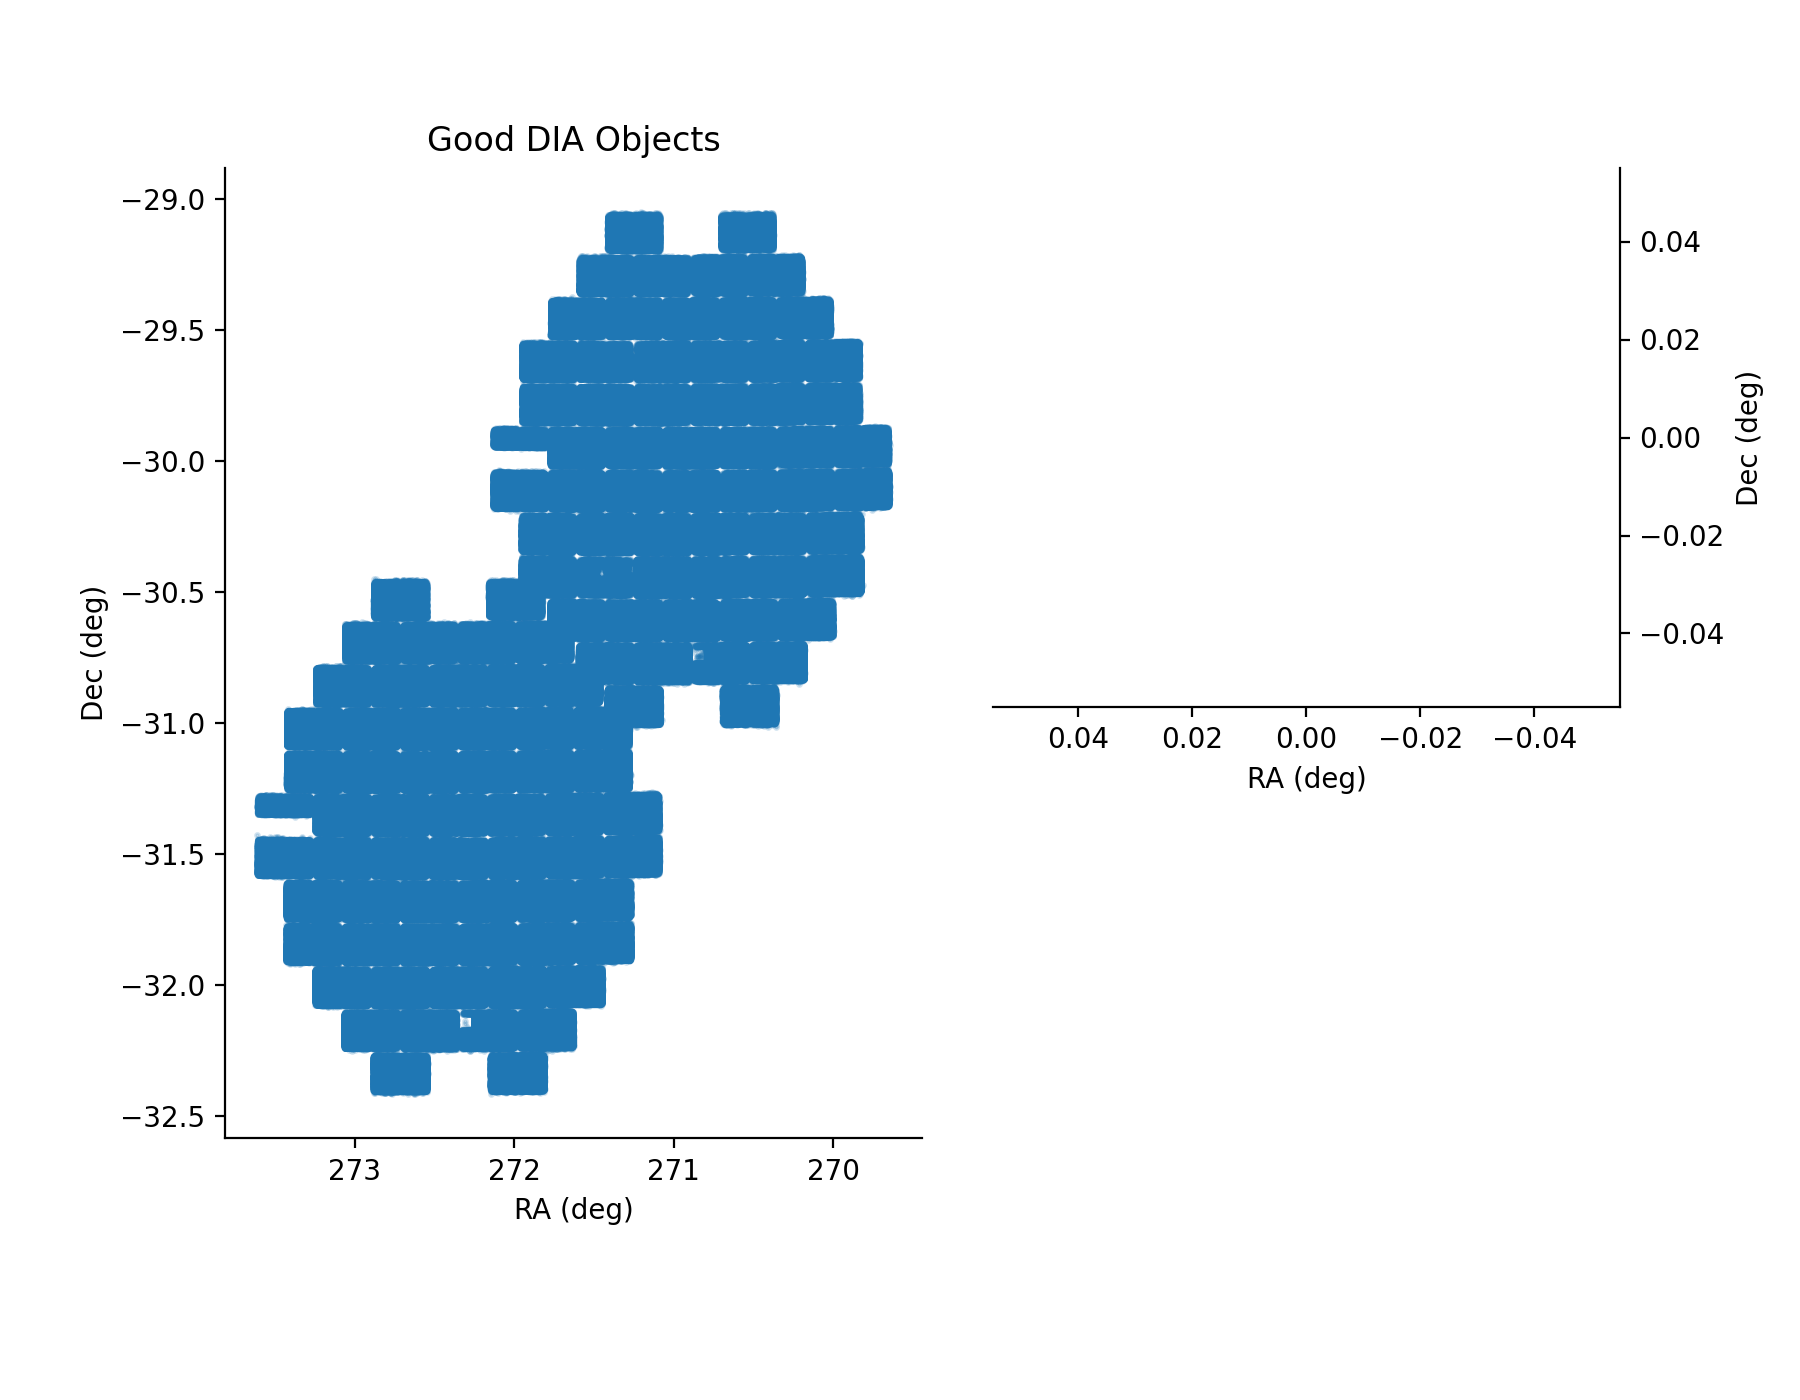

In [5]:
hitsPlot = pla.plotHitsSourcesOnSky(goodObj, title='Good DIA Objects')

<IPython.core.display.Javascript object>


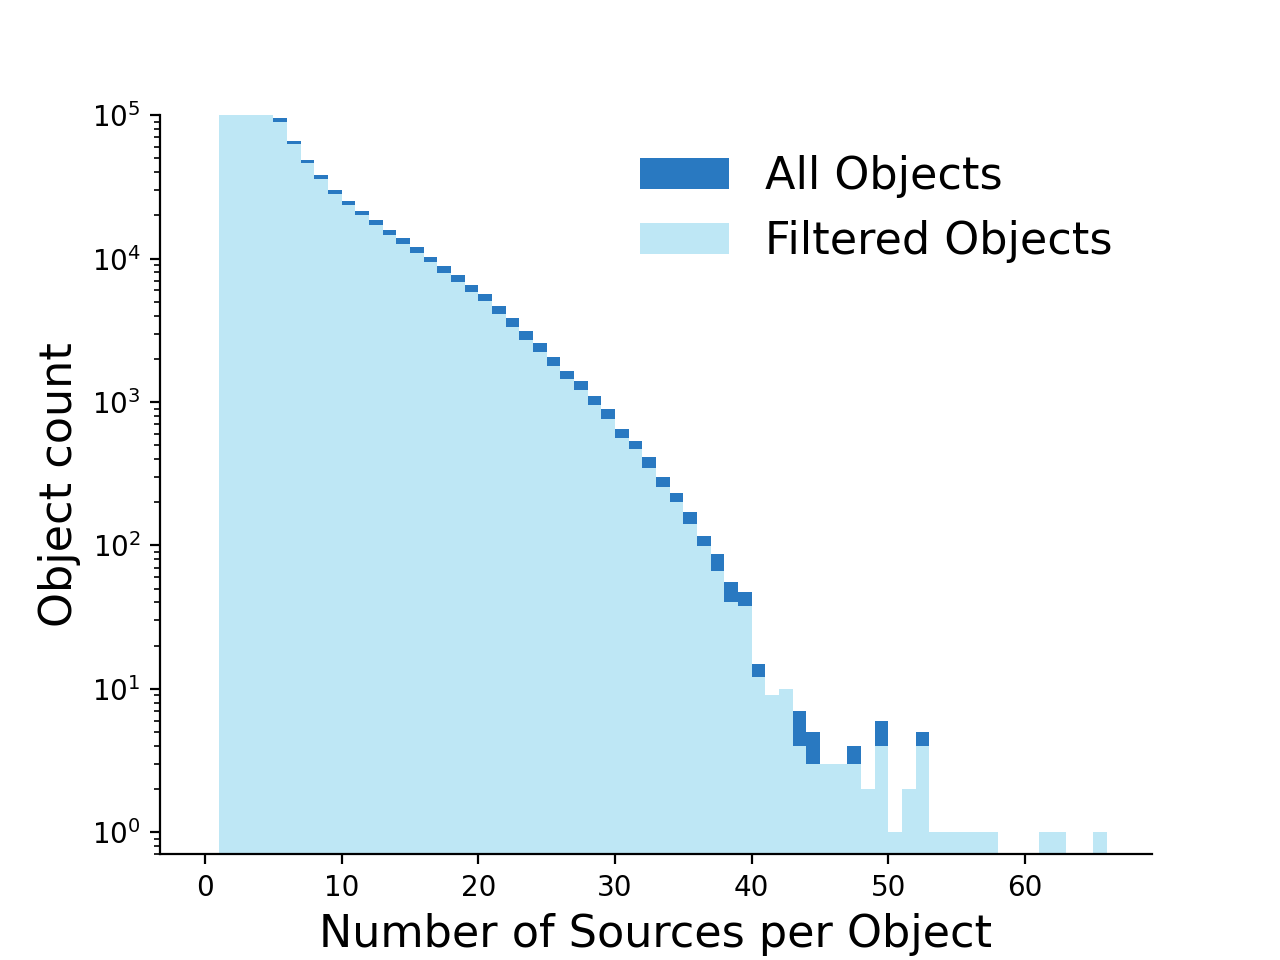

In [6]:
hist = doa.plotDiaObjectHistogram(objTable, goodObj)

<IPython.core.display.Javascript object>


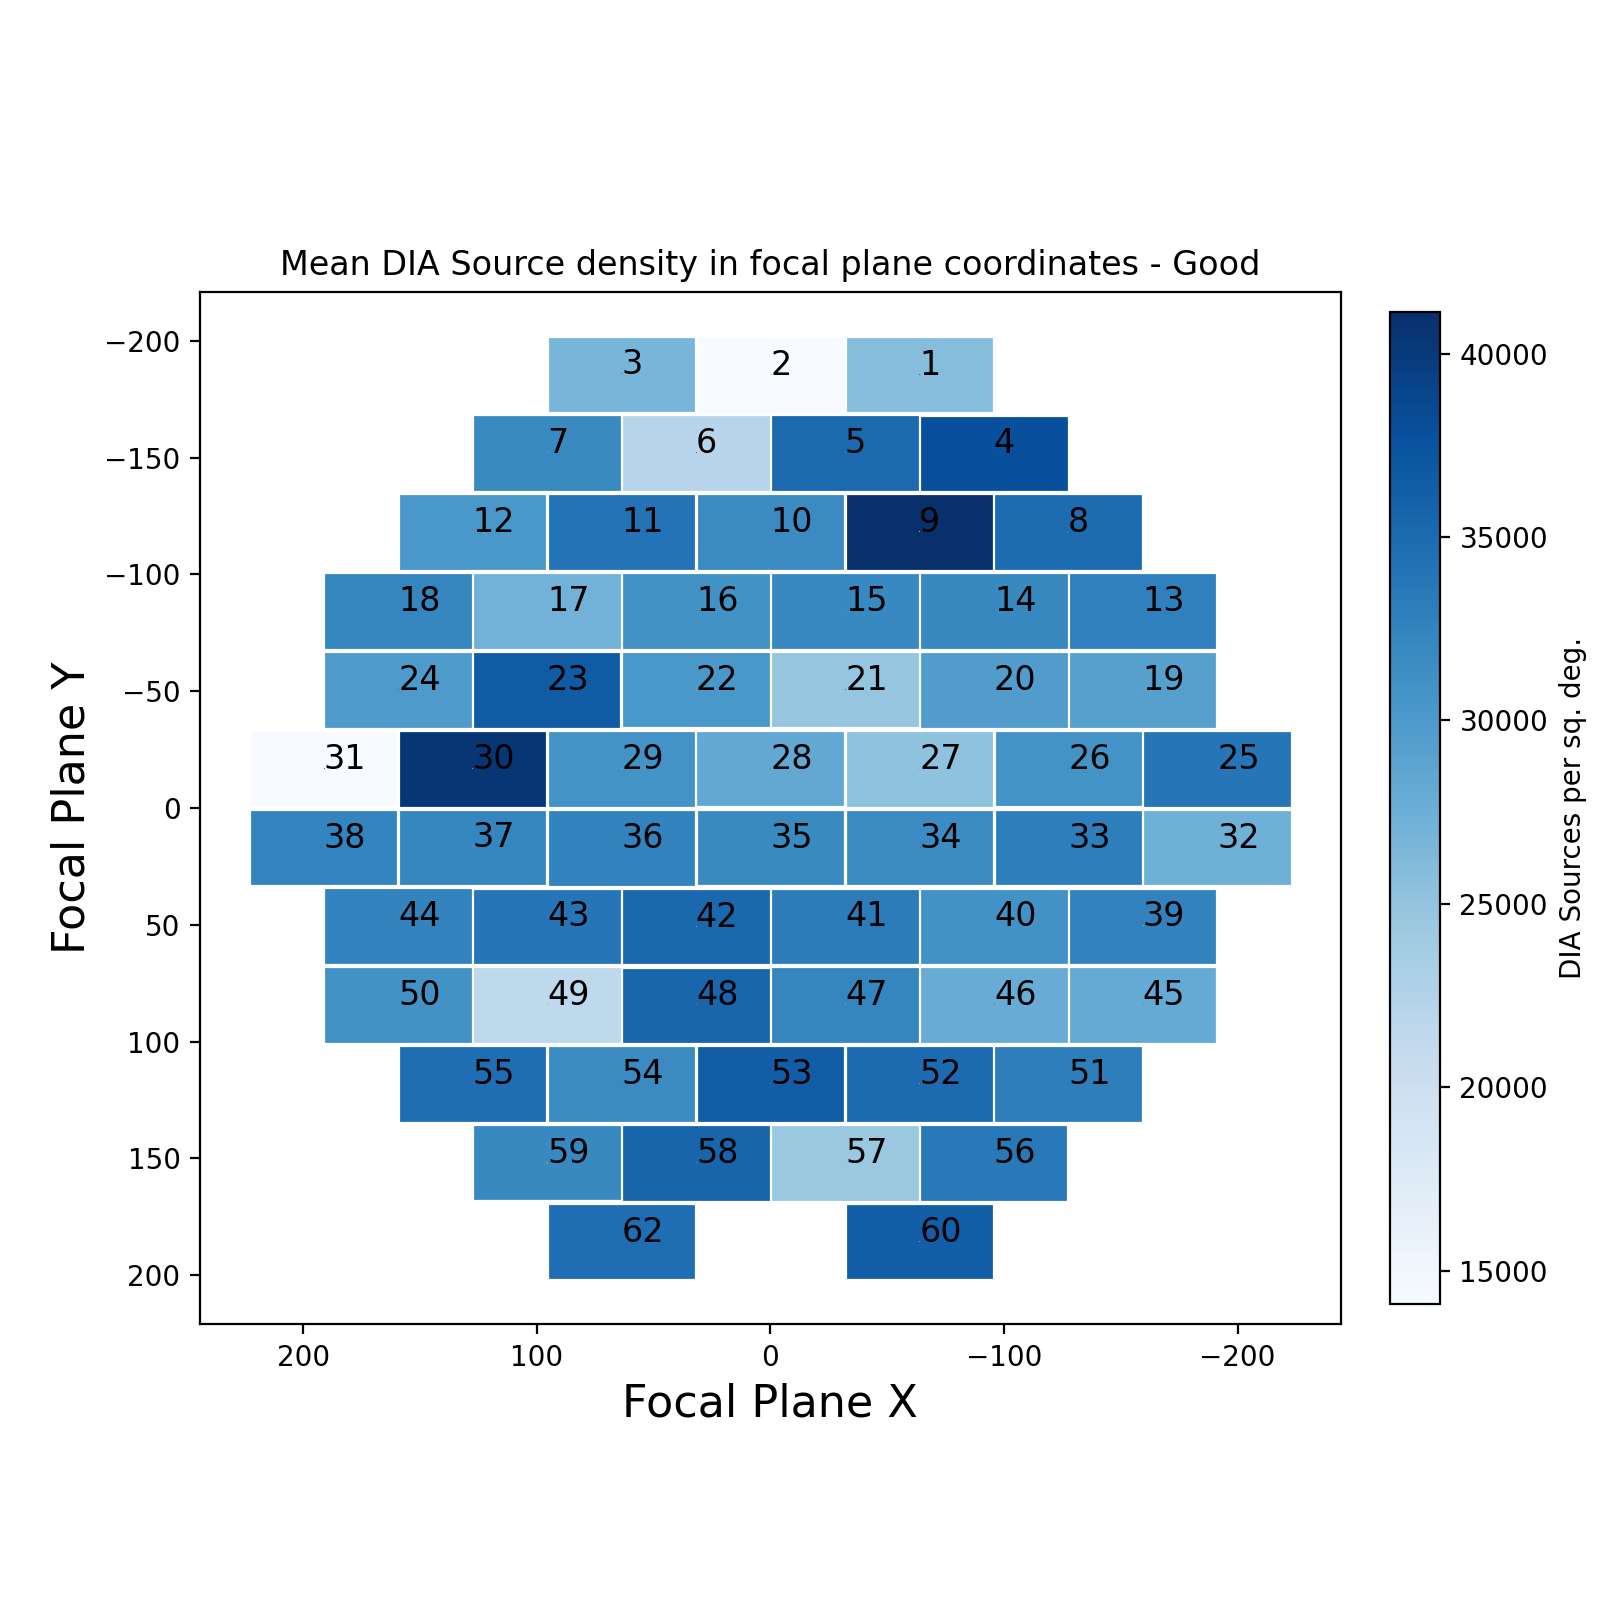

In [7]:
pla.plotDiaSourceDensityInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


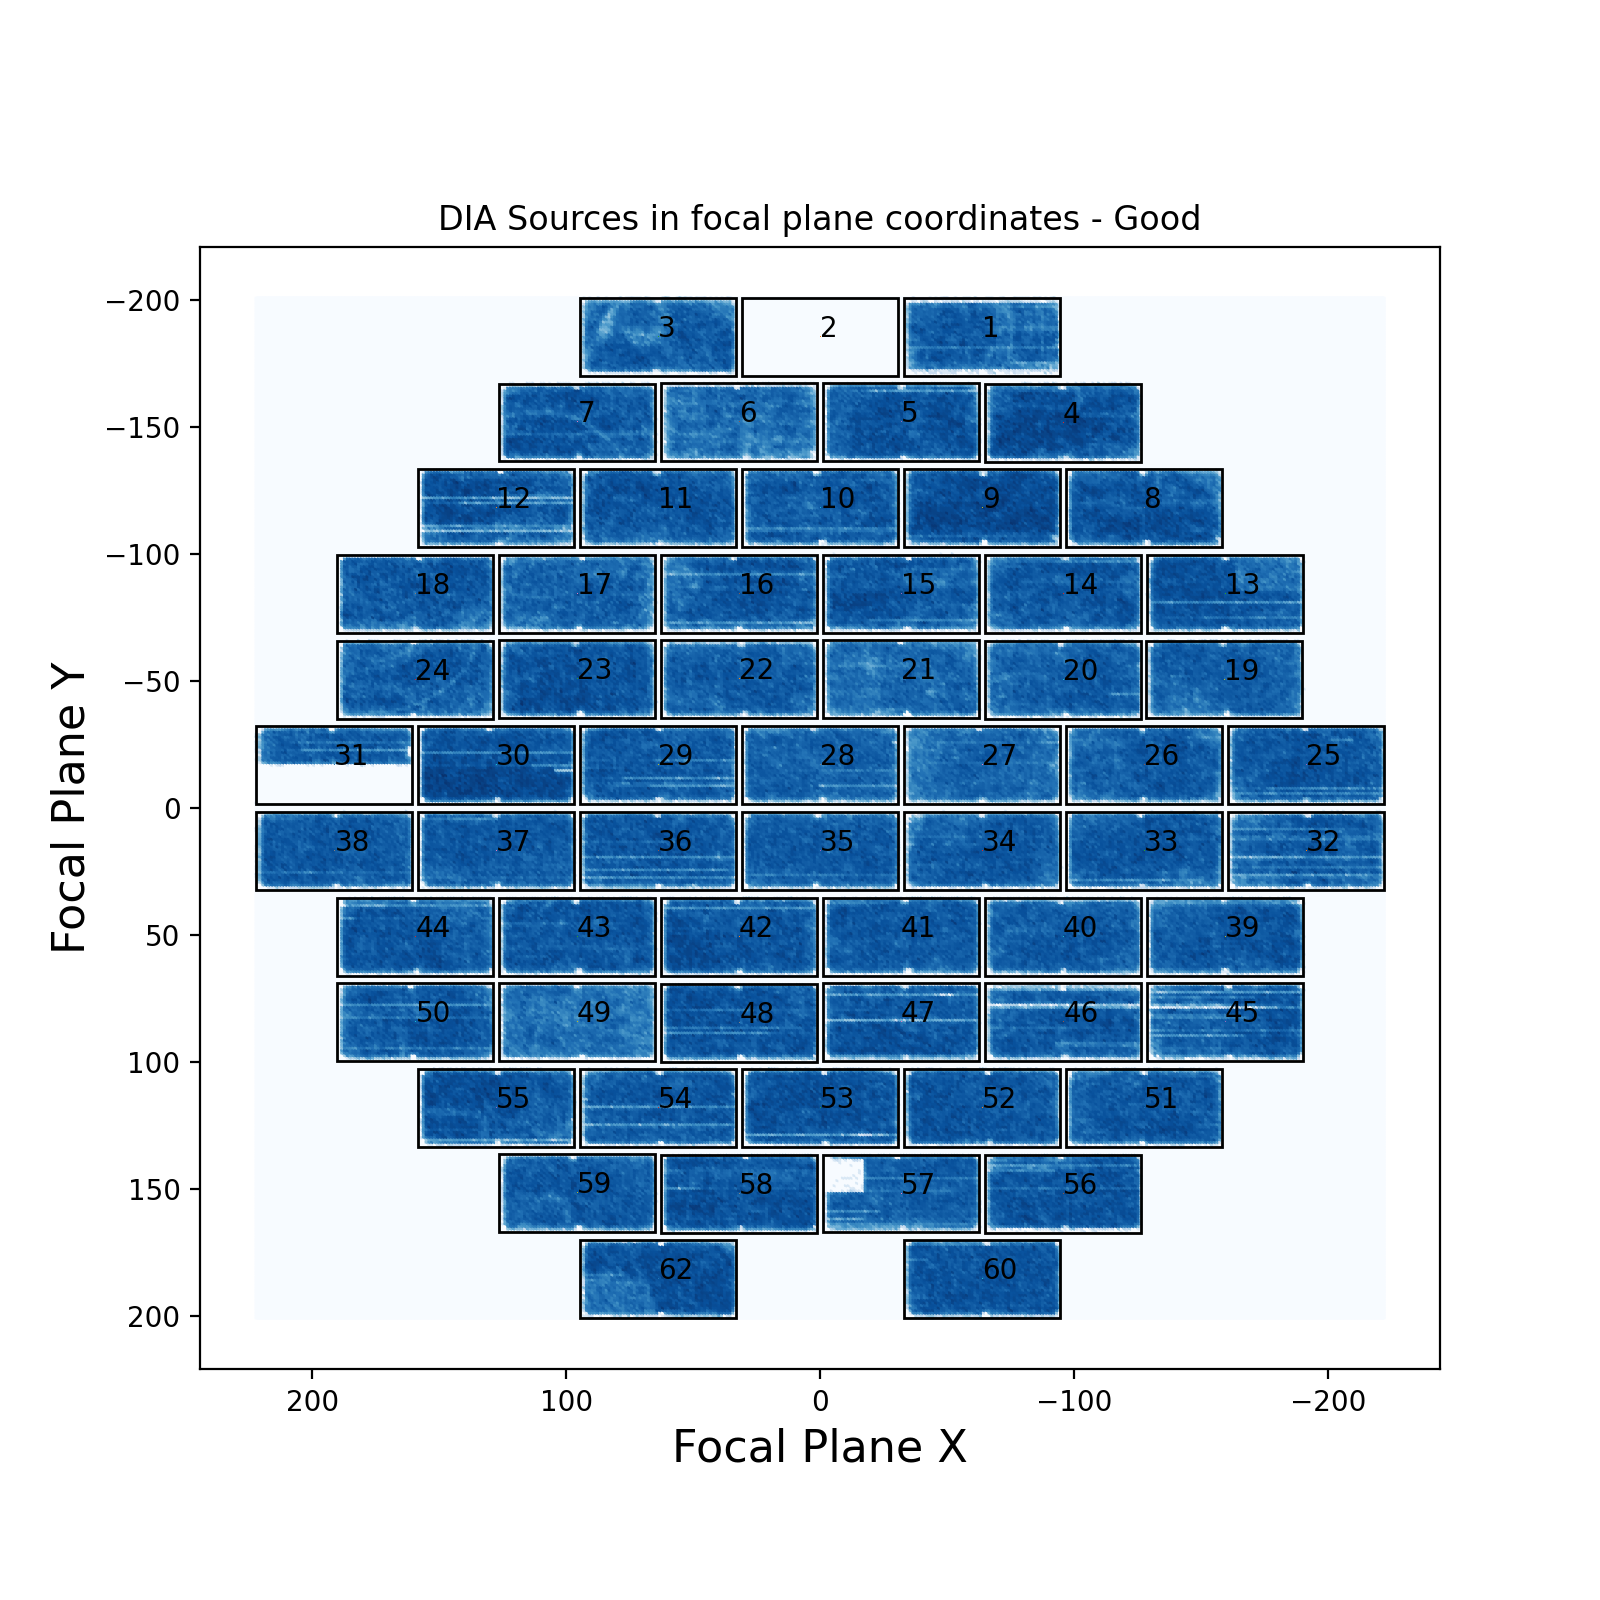

In [8]:
pla.plotDiaSourcesInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


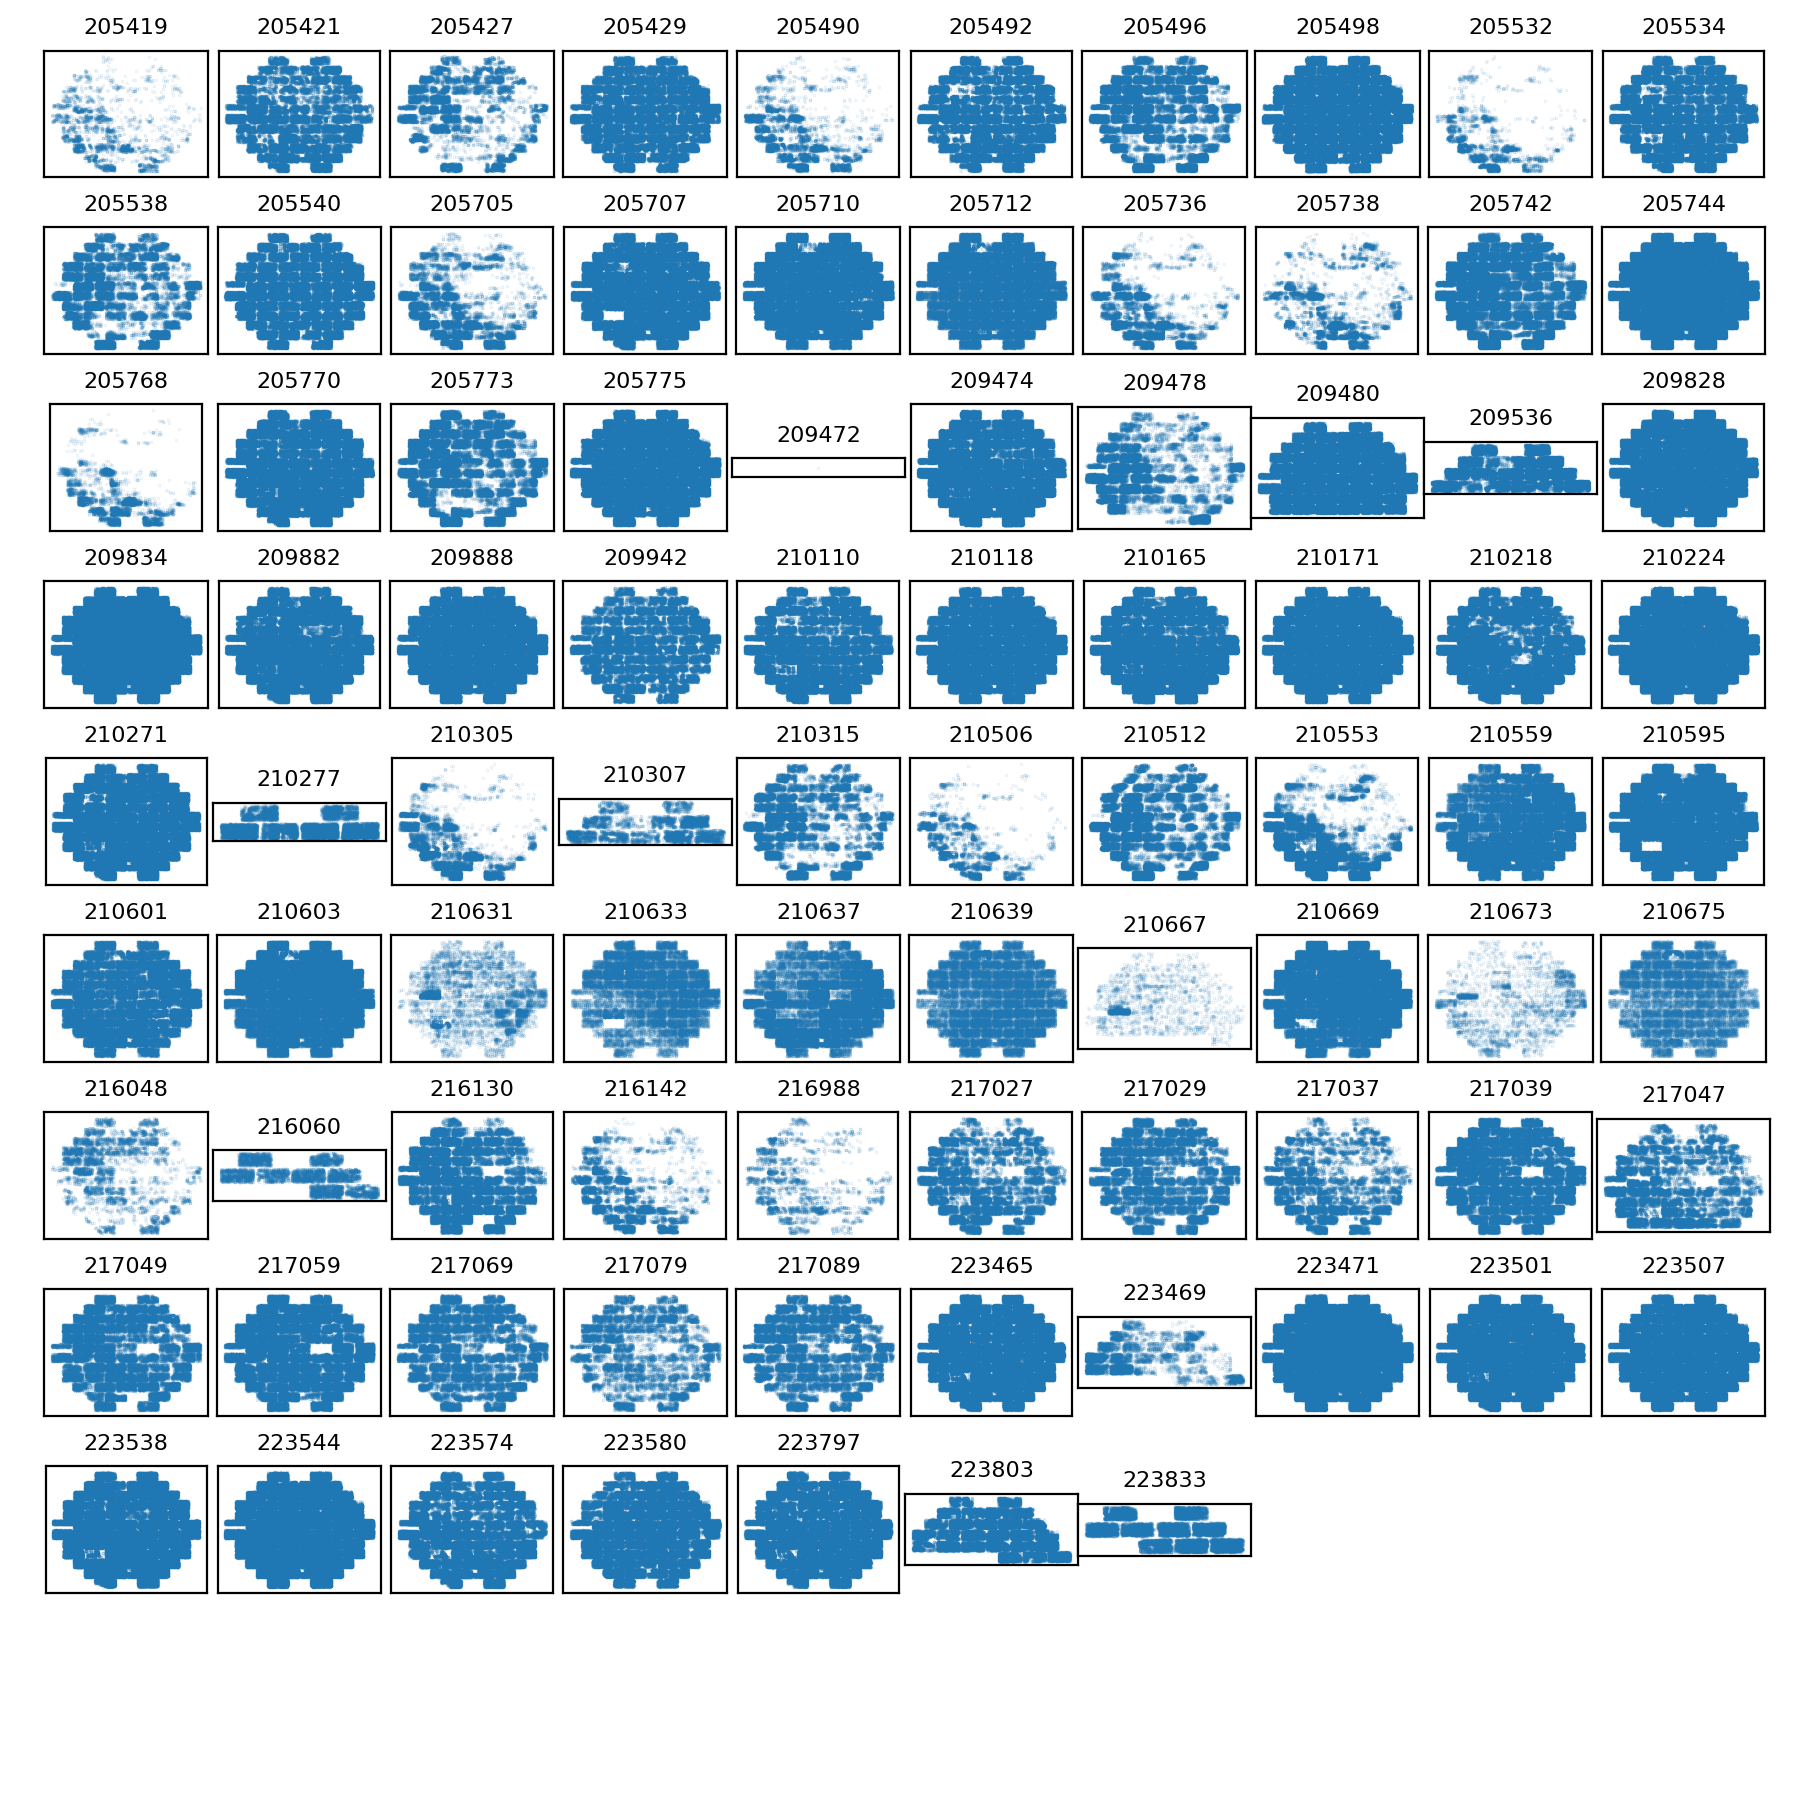

In [9]:
pla.plotDiaSourcesOnSkyGrid(repo, goodSrc)

In [10]:
def plotFluxHistSrc(srcTable1, srcTable2=None, fluxType='psFlux', label1=None, label2=None, title=None, ylog=False):
    plt.figure(figsize=(7, 5))
    plt.xlabel(fluxType, size=12)
    plt.ylabel('DIA Source count', size=12)
    #bins = np.concatenate((-1*np.flip(np.logspace(-1, 6, 50)), np.logspace(-1, 6, 50)))
    bins = np.linspace(-1e4, 1e4, 200)
    if ylog:
        plt.yscale('log')
    #plt.xscale('symlog')
    plt.hist(srcTable1[fluxType].values, bins=bins, color='#2979C1', label=label1)
    if srcTable2 is not None:
        plt.hist(srcTable2[fluxType].values, bins=bins, color='#Bee7F5', label=label2)
    if label1:
        plt.legend(frameon=False, fontsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(title)

<IPython.core.display.Javascript object>


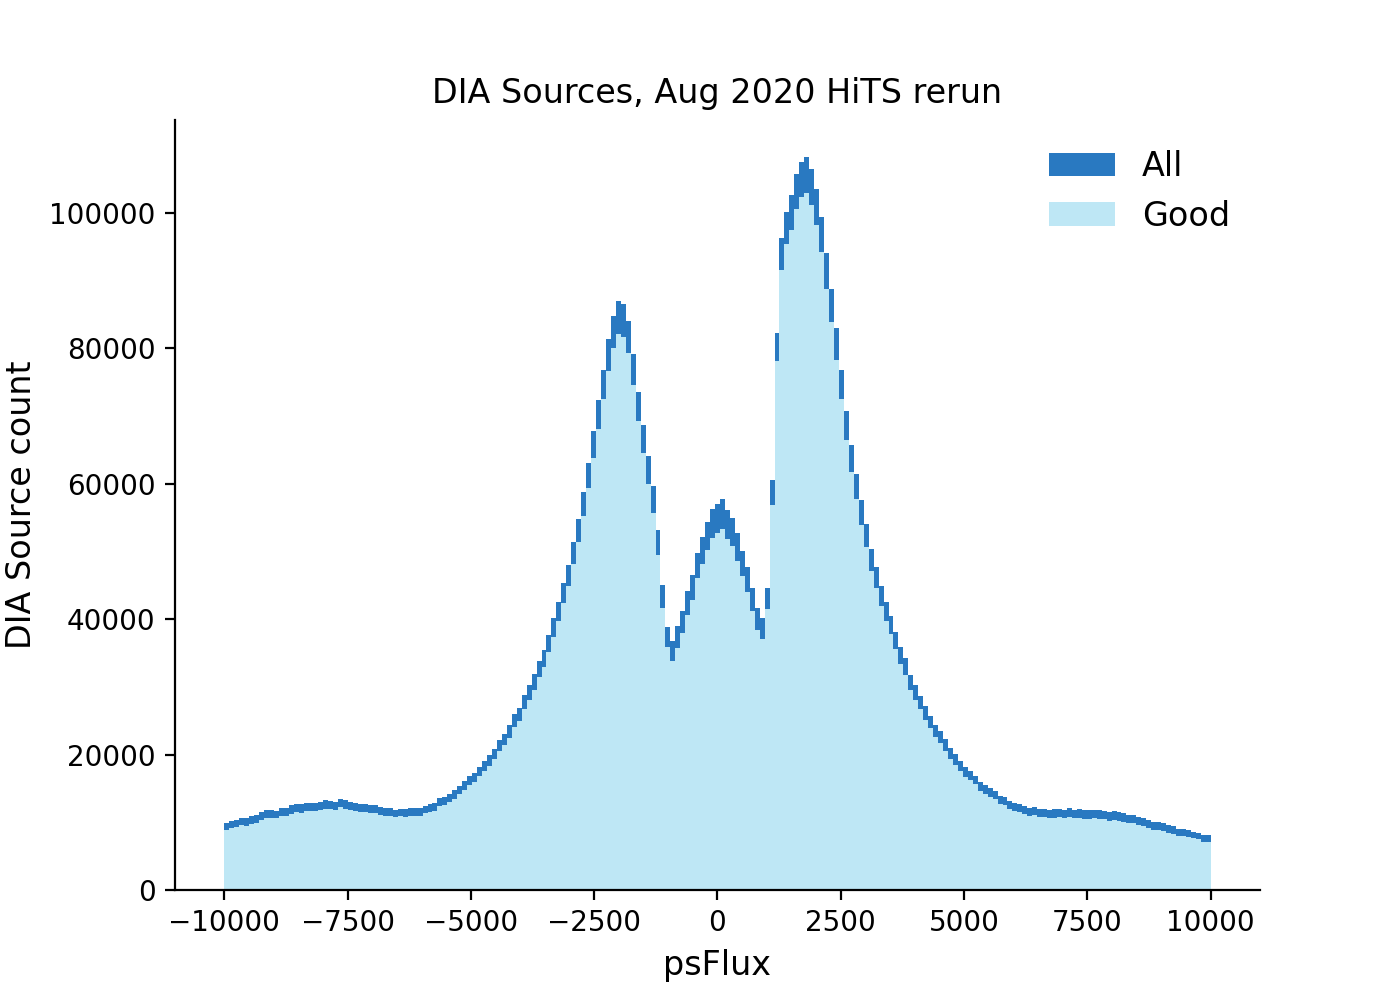

In [11]:
plotFluxHistSrc(srcTable, goodSrc, fluxType='psFlux', label1='All', label2='Good',
                title='DIA Sources, Aug 2020 HiTS rerun')

<IPython.core.display.Javascript object>


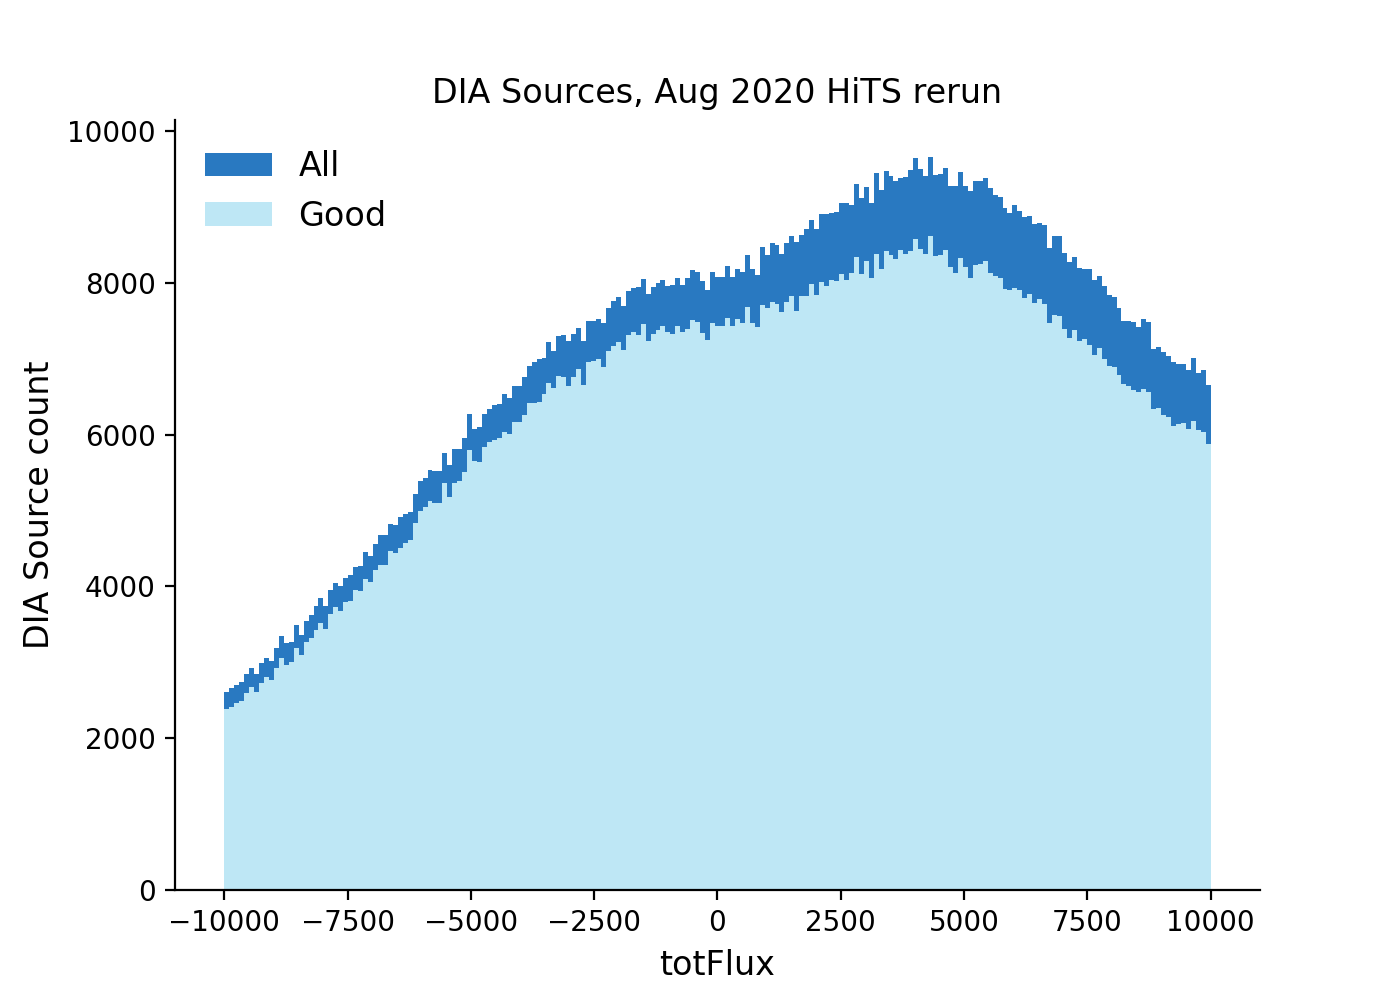

In [12]:
plotFluxHistSrc(srcTable, goodSrc, fluxType='totFlux', label1='All', label2='Good',
                title='DIA Sources, Aug 2020 HiTS rerun')

In [13]:
repo_old = '/project/mrawls/hits2015/rerun/cw_2020_07'
repo_older = '/project/mrawls/hits2015/rerun/cw_2020_06'

In [14]:
objTable_old, srcTable_old, goodObj_old, goodSrc_old = pla.loadTables(repo_old)
objTable_older, srcTable_older, goodObj_older, goodSrc_older = pla.loadTables(repo_older)

In [15]:
print(len(srcTable), len(srcTable_old), len(srcTable_older))
print(len(goodSrc), len(goodSrc_old), len(goodSrc_older))
print(len(objTable), len(objTable_old), len(objTable_older))
print(len(goodObj), len(goodObj_old), len(goodObj_older))

9141258 671170 671170
7327287 229290 229290
3645429 247550 247550
3180158 59352 59351


<IPython.core.display.Javascript object>


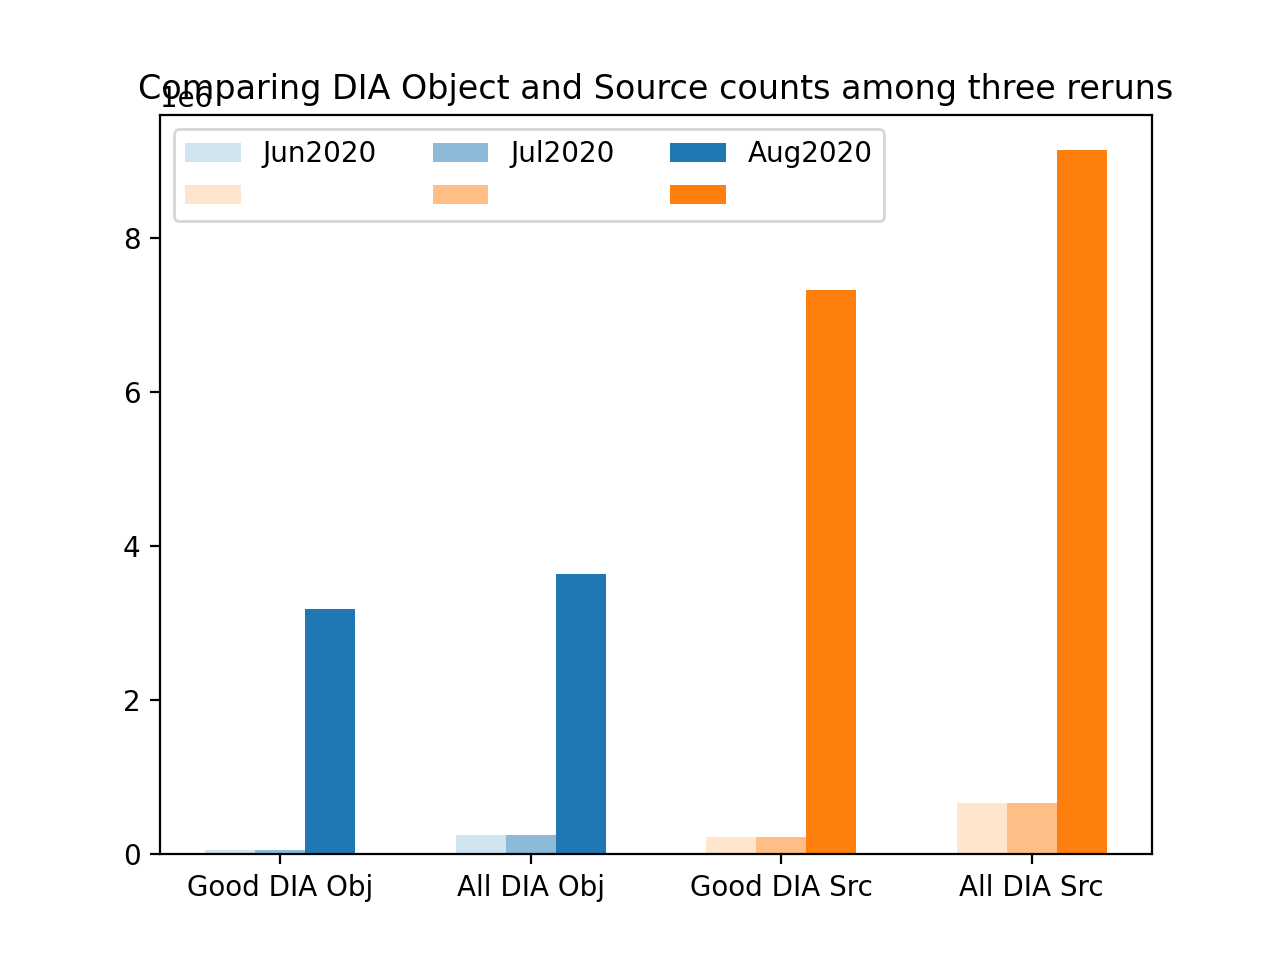

Text(0.5, 1.0, 'Comparing DIA Object and Source counts among three reruns')

In [16]:
srcTable3 = srcTable_older
goodSrc3 = goodSrc_older
objTable3 = objTable_older
goodObj3 = goodObj_older
label3 = "Jun2020"

srcTable1 = srcTable_old
goodSrc1 = goodSrc_old
objTable1 = objTable_old
goodObj1 = goodObj_old
label1 = "Jul2020"

srcTable2 = srcTable
goodSrc2 = goodSrc
objTable2 = objTable
goodObj2 = goodObj
label2 = "Aug2020"

fig, ax = plt.subplots()
barLabels = ['Good DIA Obj', 'All DIA Obj', 'Good DIA Src', 'All DIA Src']
xbar = np.array([0, 1])
width = 0.2

# June
ax.bar(xbar - width, [len(goodObj3), len(objTable3)], 
       width, label=label3, color='C0', alpha=0.2)
ax.bar(xbar + 2 - width, [len(goodSrc3), len(srcTable3)],
       width, label=' ', color='C1', alpha=0.2)

# July
ax.bar(xbar, [len(goodObj1), len(objTable1)], 
       width, label=label1, color='C0', alpha=0.5)
ax.bar(xbar + 2, [len(goodSrc1), len(srcTable1)],
       width, label=' ', color='C1', alpha=0.5)

# August
ax.bar(xbar + width, [len(goodObj2), len(objTable2)], 
       width, label=label2, color='C0')
ax.bar(xbar + 2 + width, [len(goodSrc2), len(srcTable2)],
       width, label=' ', color='C1')

plt.legend(ncol=3)
ax.set_xticks([0, 1, 2, 3])
labels = ax.set_xticklabels(barLabels)
plt.title('Comparing DIA Object and Source counts among three reruns')